![dance party](dance_party.jpg)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## Executive summary


## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

## 💪 Challenge
Your task is to devise an analytically-backed, dance-themed playlist for the company's summer party. Your choices must be justified with a comprehensive report explaining your methodology and reasoning. Below are some suggestions on how you might want to start curating the playlist:
* Use descriptive statistics and data visualization techniques to explore the audio features and understand their relationships.
* Develop and apply a machine learning model that predicts a song's `danceability`. 
* Interpret the model outcomes and utilize your data-driven insights to curate your ultimate dance party playlist of the top 50 songs according to your model.

In [29]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px
import missingno as msno

In [30]:
spotify = pd.read_csv('data/spotify.csv')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [31]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

In [32]:
#Drop NaN values from the spotify dataset
spotify.dropna(inplace=True)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113026 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113026 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113026 non-null  int64  
 5   duration_ms       113026 non-null  float64
 6   explicit          113026 non-null  bool   
 7   danceability      113026 non-null  float64
 8   energy            113026 non-null  float64
 9   key               113026 non-null  int64  
 10  loudness          113026 non-null  float64
 11  mode              113026 non-null  int64  
 12  speechiness       113026 non-null  float64
 13  acousticness      113026 non-null  float64
 14  instrumentalness  113026 non-null  float64
 15  liveness          113026 non-null  float64
 16  valence           11

<AxesSubplot: >

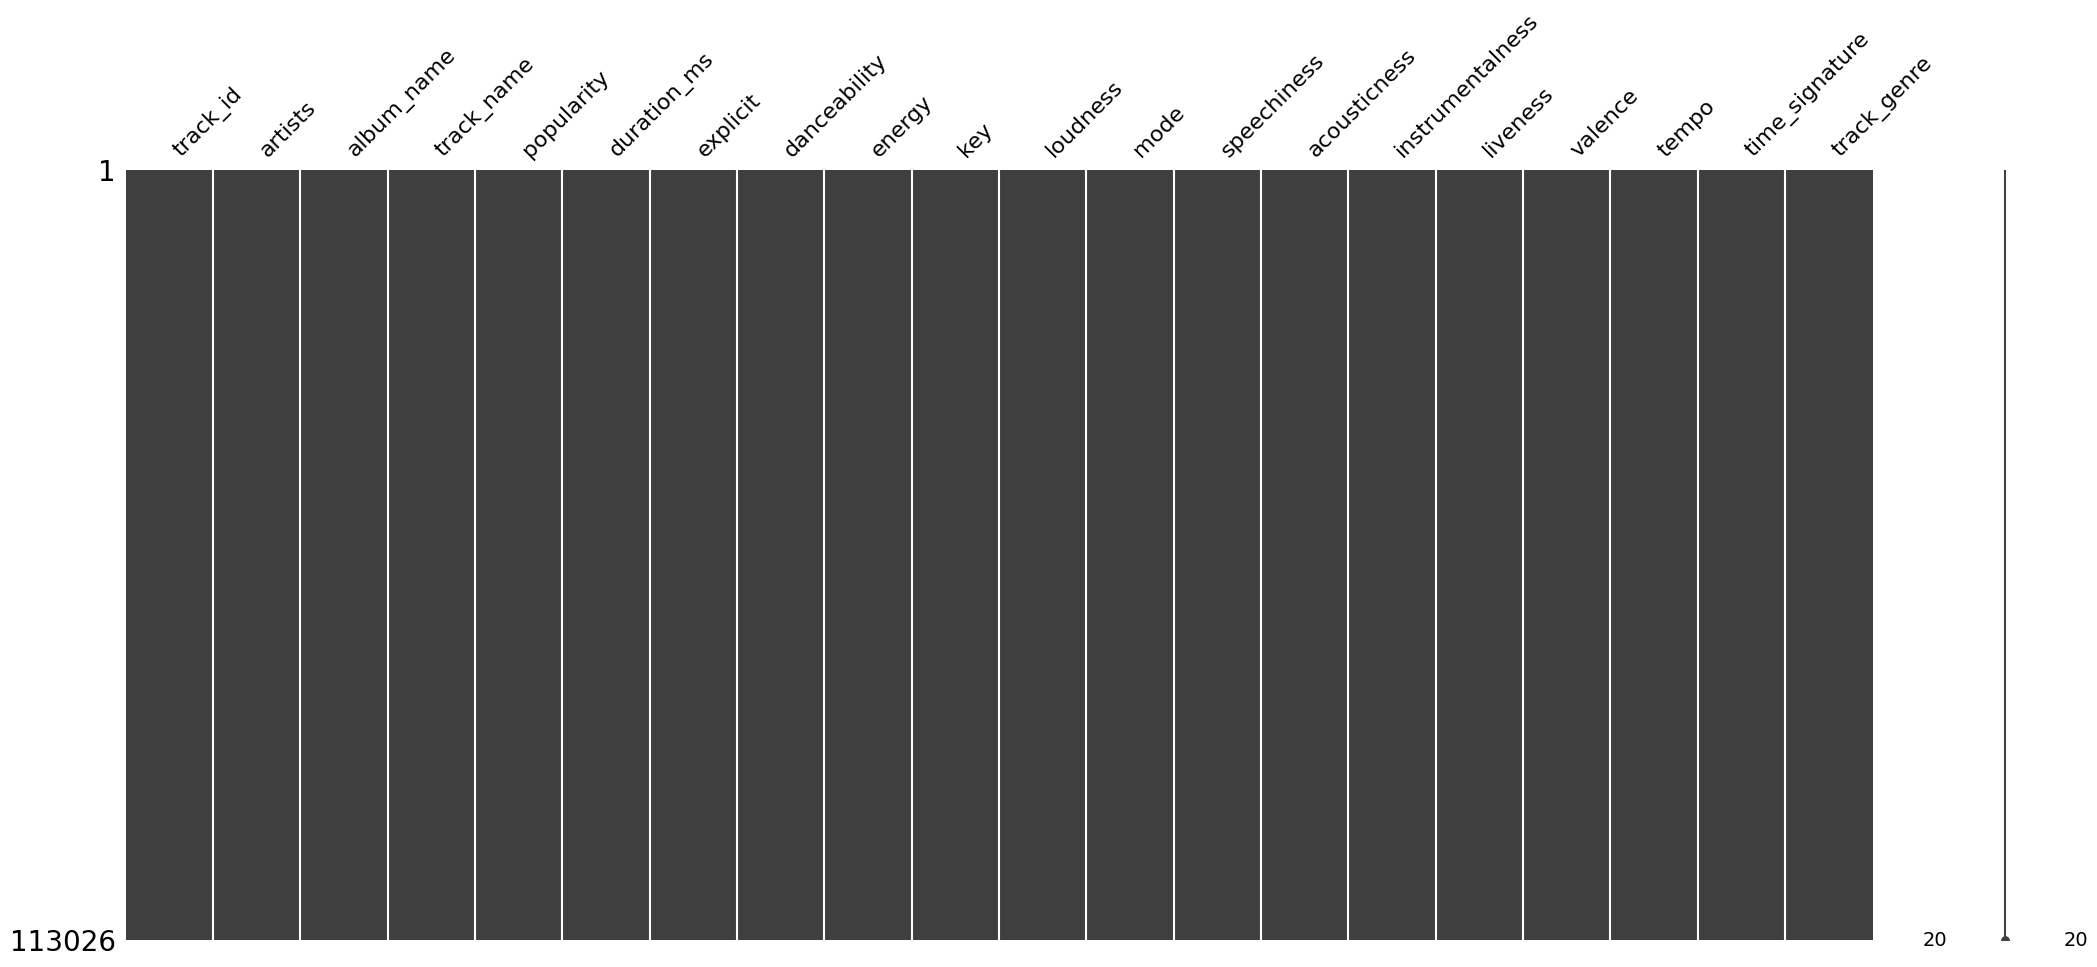

In [33]:
#Search for missing data
msno.matrix(spotify)

## Track id and Track name
After reviewing that there was no missing values, we find out that some of the songs have duplicates, more in detail by their genre and also the track name appears to have dupplicates. So now we will be dropin the duplicates and only conserve the first ones of both variables

In [34]:
# Find duplicates by track_id
spotify_duplicates = spotify[spotify.duplicated(subset=['track_id'], keep=False)].sort_values('track_id')
spotify_duplicates.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
14908,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320.0,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,chill
102298,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320.0,False,0.613,0.471,1,-6.644,0,0.1070,0.31600,0.000001,0.1170,0.406,143.064,4,soul
2092,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alt-rock
3242,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alternative
91020,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973.0,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,rock


In [35]:
# Drop duplicates and keep the first one
spotify.drop_duplicates(subset='track_id', keep='first', inplace=True)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [36]:
# Find duplicates by track_name
spotify_duplicates = spotify[spotify.duplicated(subset='track_name', keep=False)].sort_values('track_name')
spotify_duplicates.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
110443,03XMXPAE2Yx6HeqCpAPL5o,Kid Koala,Baby Driver (Music from the Motion Picture),"""Was He Slow?"" - Music From The Motion Picture...",25,106880.0,False,0.754,0.719,10,-5.806,0,0.3710,0.3730,0.259000,0.1200,0.674,175.990,4,trip-hop
110356,1Ffxfl1vuEDc0xBVPIQ50s,Kid Koala,"""Was He Slow?"" (Music From The Motion Picture ...","""Was He Slow?"" - Music From The Motion Picture...",37,106880.0,False,0.754,0.719,10,-5.806,0,0.3710,0.3730,0.259000,0.1200,0.674,175.990,4,trip-hop
60488,5y2cZBC8Mq4TQp2I6Vo0ne,#NAME?,#NAME?,#NAME?,32,247826.0,False,0.429,0.959,10,-3.214,1,0.0905,0.0370,0.000193,0.0474,0.651,158.031,4,j-idol
60491,4YFrH7oE7c35mJX3kAQbWb,#NAME?,全部、内緒。 (Special Edition),#NAME?,38,246546.0,False,0.415,0.963,10,-2.651,1,0.0952,0.0374,0.000222,0.0594,0.618,158.048,4,j-idol
70275,7DtuFvOjcJSFuCVeq3U7ns,吳青峰;Stefanie Sun,馬拉美的星期二,(......醉鬼阿Q)(feat. 孫燕姿),41,216399.0,False,0.586,0.790,7,-6.834,1,0.0453,0.0254,0.000761,0.1380,0.228,120.067,4,mandopop


In [37]:
# Drop duplicates and keep the first one
spotify.drop_duplicates(subset='track_name', keep='first', inplace=True)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [38]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72935 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          72935 non-null  object 
 1   artists           72935 non-null  object 
 2   album_name        72935 non-null  object 
 3   track_name        72935 non-null  object 
 4   popularity        72935 non-null  int64  
 5   duration_ms       72935 non-null  float64
 6   explicit          72935 non-null  bool   
 7   danceability      72935 non-null  float64
 8   energy            72935 non-null  float64
 9   key               72935 non-null  int64  
 10  loudness          72935 non-null  float64
 11  mode              72935 non-null  int64  
 12  speechiness       72935 non-null  float64
 13  acousticness      72935 non-null  float64
 14  instrumentalness  72935 non-null  float64
 15  liveness          72935 non-null  float64
 16  valence           72935 non-null  float

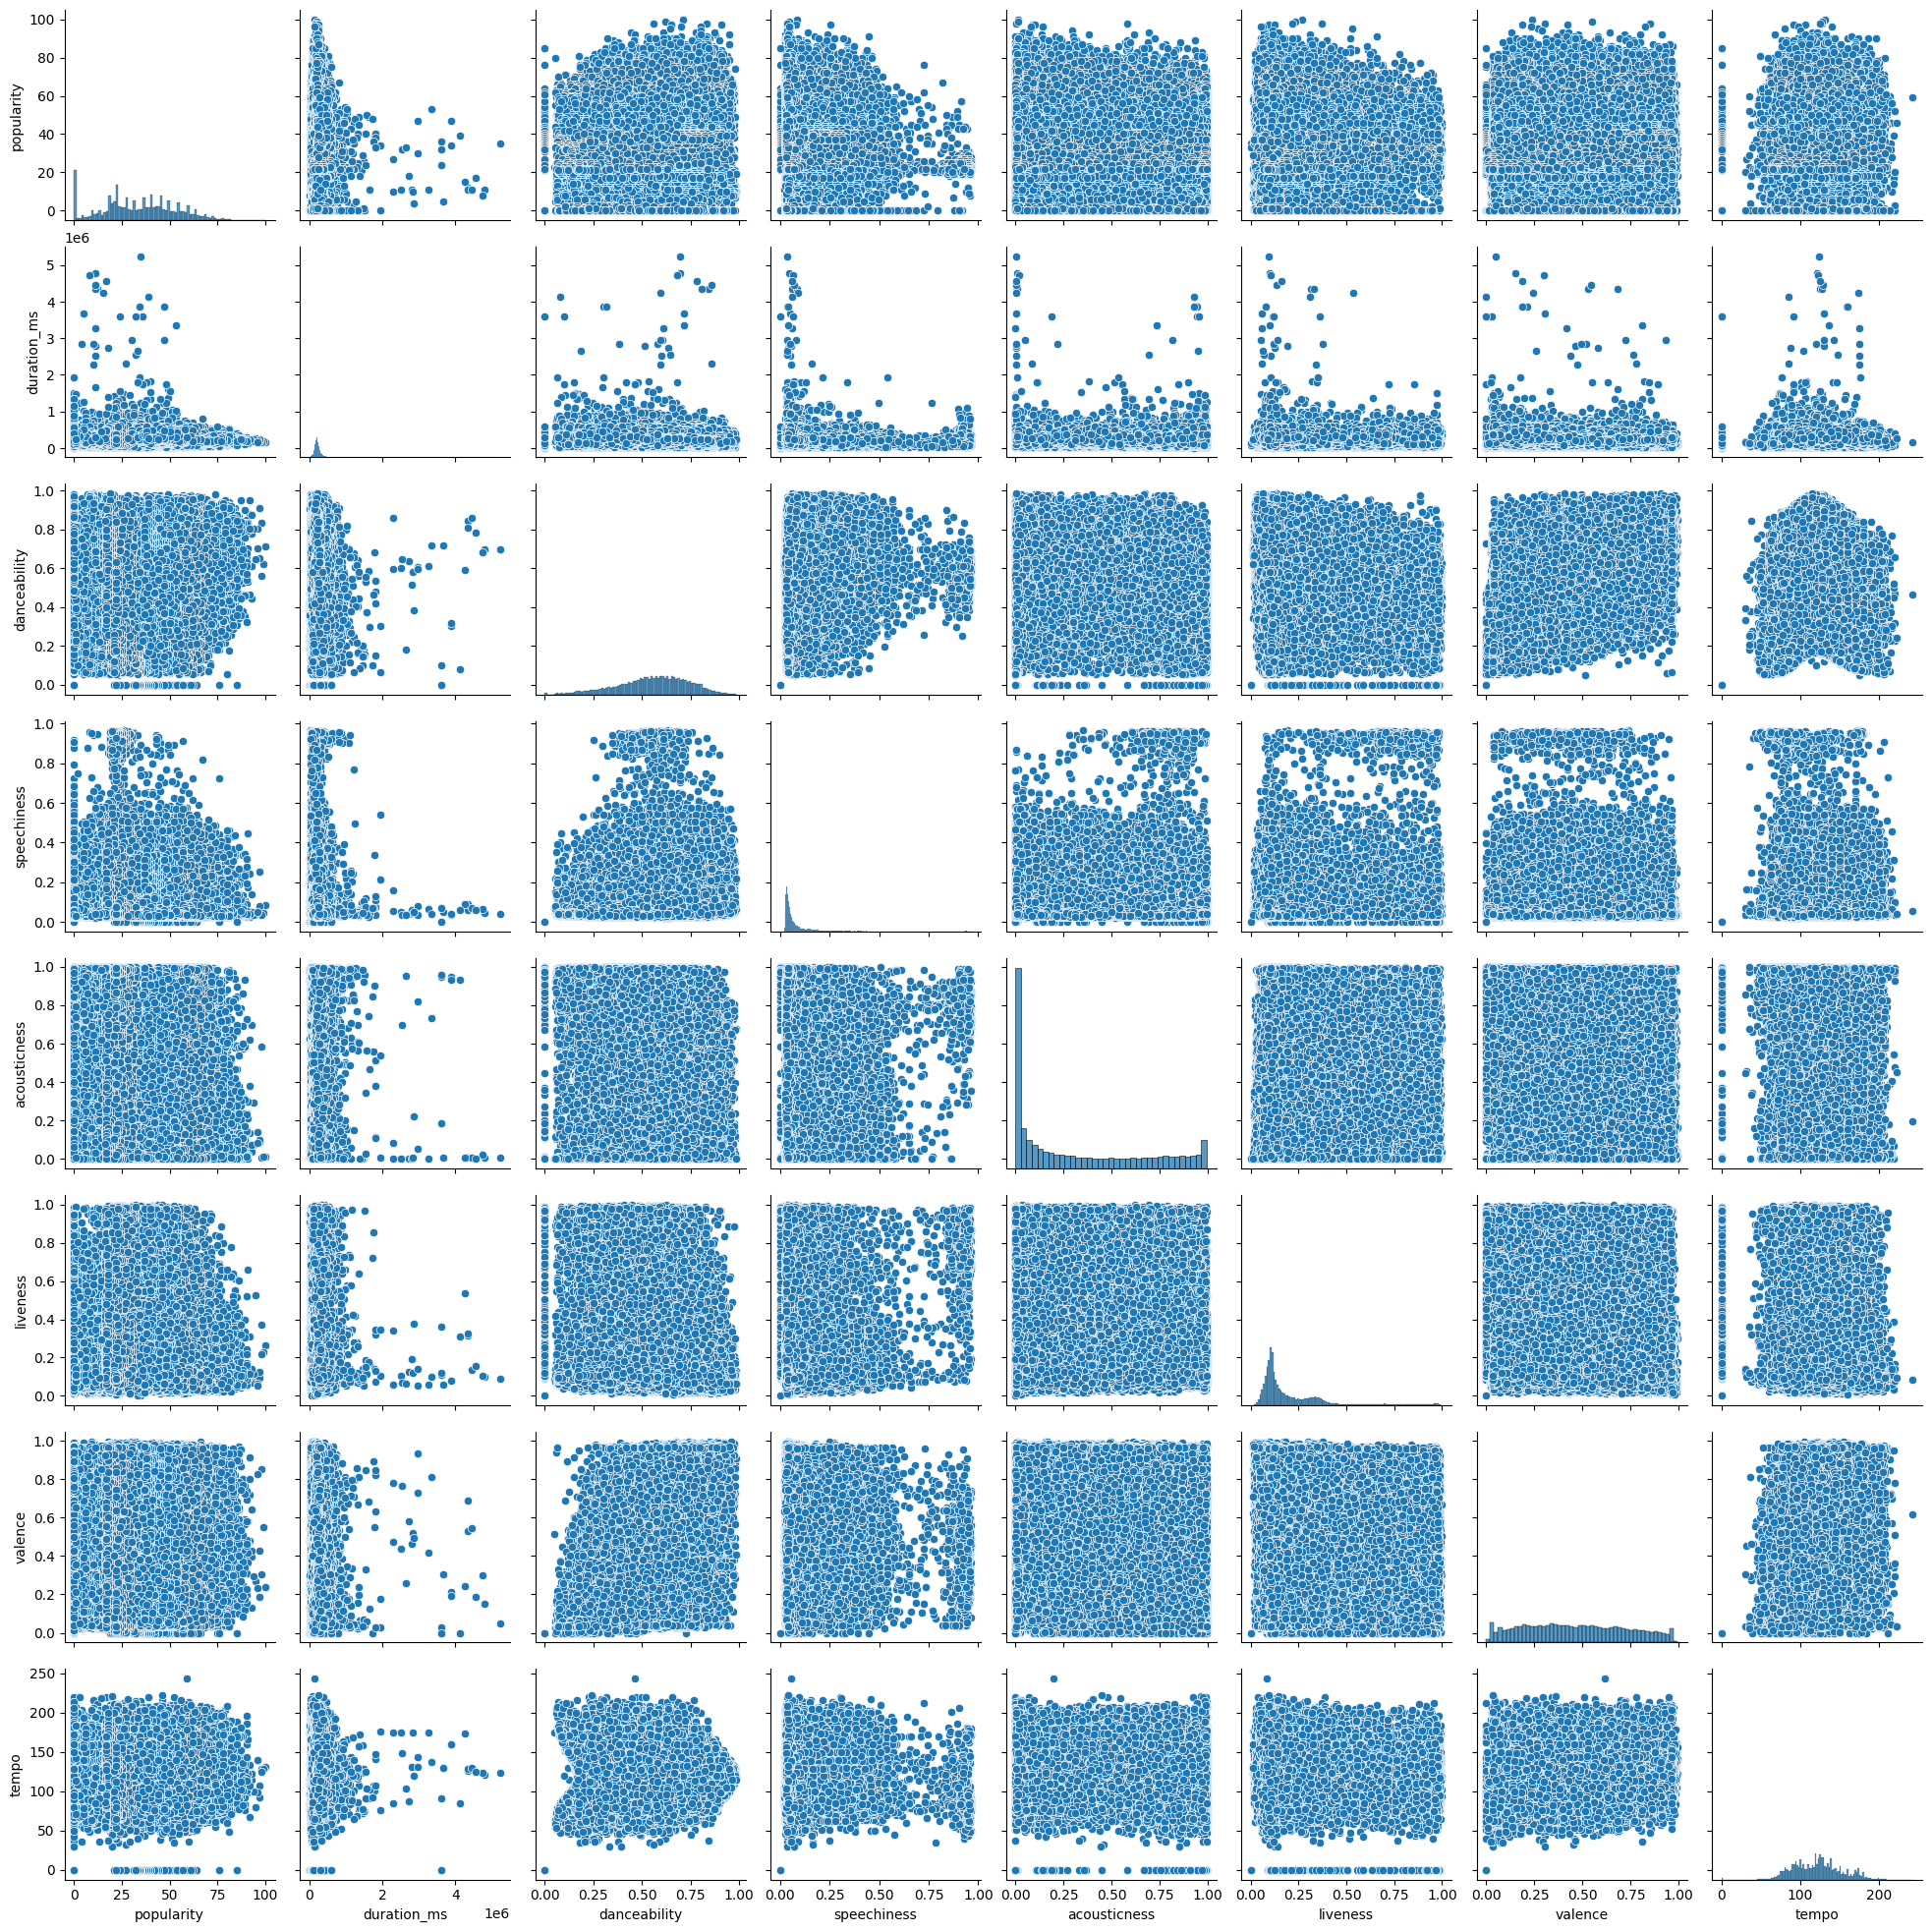

In [41]:
# Select numeric variables
numeric_vars = ['popularity', 'duration_ms', 'danceability', 'speechiness','acousticness', 'liveness', 'valence', 'tempo']

# Create pairplot
sns.pairplot(spotify[numeric_vars])

## Artists

In [42]:
# Get the top 10 most common artist names
top_10_artists = spotify['artists'].value_counts().head(10)

# Create a bar chart
fig = px.bar(x=top_10_artists.index, y=top_10_artists.values)
fig.update_layout(
    title='Top 10 Most Common Artist Names',
    xaxis_title='Artist Name',
    yaxis_title='Count',
    xaxis_tickangle=-45
)
fig.show()

In [45]:
# Drop artist names who don't start with a letter 
spotify = spotify[spotify['artists'].str.match(r'^[a-zA-Z]')]
spotify.head()

## Popularity

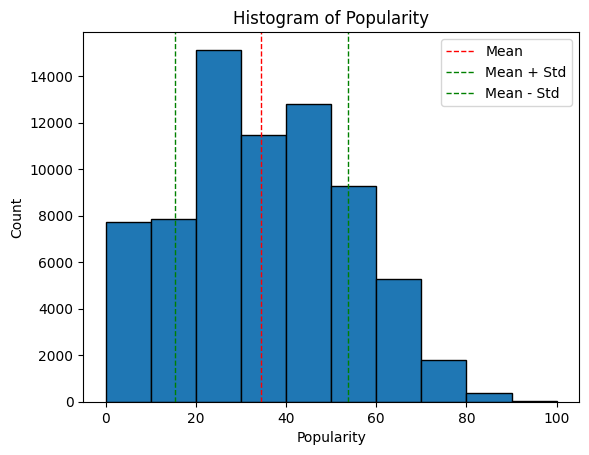

In [49]:
# Create histogram for popularity
import matplotlib.pyplot as plt

plt.hist(spotify['popularity'], bins=10, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Histogram of Popularity')

# Add mean and standard deviation
mean_popularity = spotify['popularity'].mean()
std_popularity = spotify['popularity'].std()
plt.axvline(mean_popularity, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean_popularity + std_popularity, color='green', linestyle='dashed', linewidth=1, label='Mean + Std')
plt.axvline(mean_popularity - std_popularity, color='green', linestyle='dashed', linewidth=1, label='Mean - Std')

plt.legend()
plt.show()